In [1]:
import pandas as pd

# Admission Prediction

## Introduction

The objective of this mini-project is to make a simple machine learning model to make a prediction. I will be working with graduate admission data from Kaggle. Predicting the chance of admission base on his scores.

## Loading the Data

The dataset is available at [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv).

In [2]:
raw_data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
raw_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Notice that the Serial No. column is the same as the index and has no meaning to the prediction. I decide to drop it to avoid problems in the future.

In [4]:
raw_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
raw_data.drop('Serial No.', axis=1, inplace=True) 

In [6]:
raw_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Exploratory Data Analysis

In [7]:
import seaborn as sns

In [8]:
raw_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


The observation shows that:
- All columns are numeric features.
- There is no missing value in any column.
- 4 columns are integers, 4 columns are floats.

### Correlation

In [10]:
raw_data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


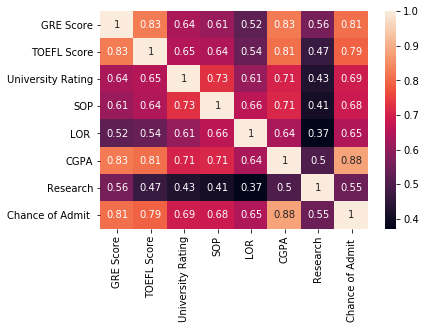

In [11]:
sns.heatmap(raw_data.corr(), annot=True);

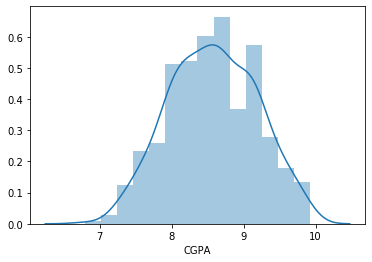

In [12]:
sns.distplot(raw_data['CGPA']);

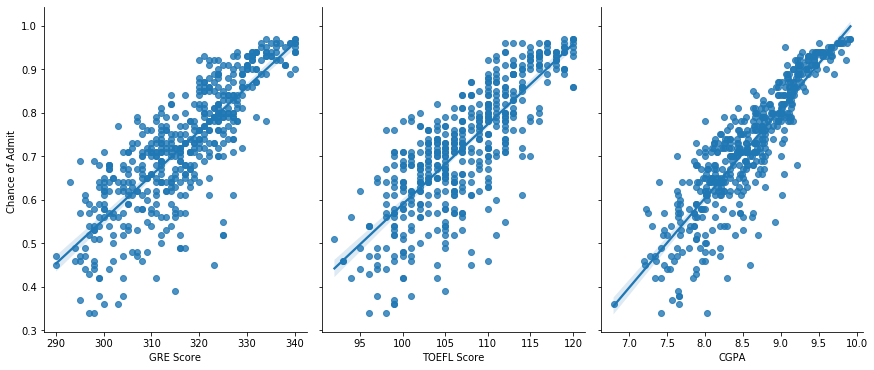

In [13]:
sns.pairplot(raw_data, x_vars=['GRE Score', 'TOEFL Score', 'CGPA'], y_vars='Chance of Admit ', height=5, aspect=0.8, kind='reg');

The observation shows that:
- 3 columns have a high correlation to target label (approximately above 0.75), which are GRE Score, TOEFL Score, and CGPA.
- CGPA follows the normal distribution.
- GRE Score, TOEFL Score, and CGPA have a linear relationship with the target label.

## Modeling

Because the features have a linear relationship with the target label, I consider using LinearRegression as it is a simple linear model. I only use 3 features that have the highest correlation to train this model.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [15]:
X = raw_data[['GRE Score', 'TOEFL Score', 'CGPA']]
y = raw_data['Chance of Admit ']

### Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X_train.head()

,GRE Score,TOEFL Score,CGPA
107,338,117,9.46
336,319,110,8.79
71,336,112,9.76
474,308,105,7.95
6,321,109,8.20


### Fitting Model

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = lin_reg.predict(X_test)

In [20]:
y_pred[:5]

array([0.62802152, 0.83209435, 0.79119818, 0.85046086, 0.60222891])

In [21]:
y_test.to_numpy()[:5]

array([0.64, 0.85, 0.8 , 0.91, 0.68])

The predicted values are quite close to true values.

### Scoring

In [22]:
lin_reg.score(X_train, y_train)

0.8122343451664387

In [23]:
lin_reg.score(X_test, y_test)

0.7632878240069341

In [24]:
mean_absolute_error(y_test, y_pred)

0.04688621359385712

- The score on train data is around 0.812
- The score on test data is around 0.763
- Mean Absolute Error (MAE) is around 0.047